In [6]:
import numpy as np
import pandas as pd
from pandas_datareader import data as pdr
import matplotlib.pyplot as plt
import yfinance as yfin

In [7]:
yfin.pdr_override()

In [11]:
tickers = ['PG', 'MSFT','F','GE']

mydata = pd.DataFrame()

for t in tickers:

    mydata[t] = yfin.download(t,start='1995-1-1')['Adj Close']
    
    

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [12]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7281 entries, 1995-01-03 to 2023-12-01
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PG      7281 non-null   float64
 1   MSFT    7281 non-null   float64
 2   F       7281 non-null   float64
 3   GE      7281 non-null   float64
dtypes: float64(4)
memory usage: 284.4 KB


In [9]:
mydata.head()

,PG,MSFT,F,GE
Date,,,,
1995-01-03,7.626418,2.332129,3.819579,25.494421
1995-01-04,7.565282,2.349082,3.922347,25.494421
1995-01-05,7.458303,2.310334,3.888093,25.556910
1995-01-06,7.473582,2.349082,3.888093,25.431952
1995-01-09,7.443020,2.334551,3.956604,25.181997


In [10]:
mydata.tail()

,PG,MSFT,F,GE
Date,,,,
2023-11-27,151.240005,378.609985,10.34,119.970001
2023-11-28,152.289993,382.700012,10.37,118.849998
2023-11-29,151.130005,378.850006,10.59,118.860001
2023-11-30,153.520004,378.910004,10.26,121.800003
2023-12-01,152.660004,374.510010,10.58,122.500000


In [13]:
mydata.iloc[0]        ## First row data appear

PG       7.626420
MSFT     2.332129
F        3.819579
GE      25.494436
Name: 1995-01-03 00:00:00, dtype: float64

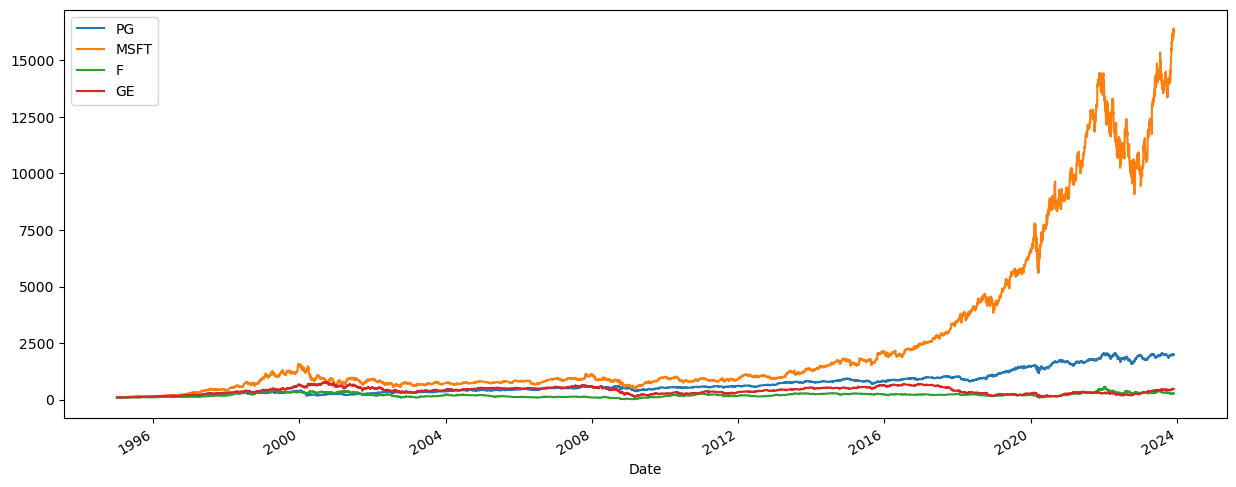

In [14]:
(mydata/mydata.iloc[0] * 100).plot(figsize = (15,6))
plt.show()

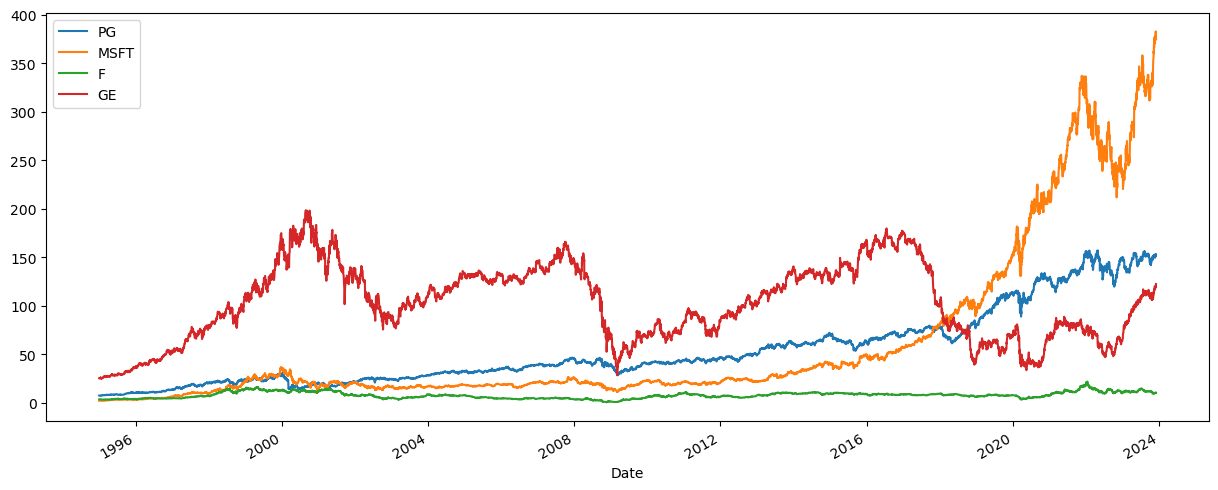

In [15]:
mydata.plot(figsize=(15,6))
plt.show()

In [16]:
mydata.loc['1995-01-03']

PG       7.626420
MSFT     2.332129
F        3.819579
GE      25.494436
Name: 1995-01-03 00:00:00, dtype: float64

In [17]:
mydata.iloc[0]             ## we just obtained the first row entire data

PG       7.626420
MSFT     2.332129
F        3.819579
GE      25.494436
Name: 1995-01-03 00:00:00, dtype: float64

# Calculating the Return of a Portfolio of Securities

In [18]:
returns  = (mydata/mydata.shift(1)) - 1
returns.head()

,PG,MSFT,F,GE
Date,,,,
1995-01-03,NaN,NaN,NaN,NaN
1995-01-04,-0.008017,0.007269,0.026906,0.000000
1995-01-05,-0.014141,-0.016495,-0.008734,0.002451
1995-01-06,0.002049,0.016772,0.000000,-0.004890
1995-01-09,-0.004089,-0.006186,0.017621,-0.009828


In [19]:
weights = np.array([0.25, 0.25, 0.25, 0.25])

# using np.dot function to calculate the single return of a portfolio

In [20]:
np.dot(returns, weights)     ## np.dot function perform matrix multiplication

array([        nan,  0.00653971, -0.0092299 , ...,  0.00090554,
        0.00238653,  0.00493051])

In [21]:
annual_returns = returns.mean() * 250
annual_returns

PG      0.127454
MSFT    0.223321
F       0.115581
GE      0.104867
dtype: float64

In [23]:
np.dot(annual_returns, weights)     ## Here we obtained a single number of return from a Portfolio

0.14280561010744558

In [38]:
pfolio_1 = (str(round(np.dot(annual_returns, weights), 5) * 100) +  ' %')
print(pfolio_1)

14.280999999999999 %


In [39]:
weights_2 = np.array([0.40, 0.40, 0.15, 0.05])

In [41]:
pfolio_2 = (str(round(np.dot(annual_returns, weights_2), 5) * 100) +  ' %')
print (pfolio_1)
print (pfolio_2)

14.280999999999999 %
16.289 %
